## Challenge Lab

This lab aims to test your ability to generate a model (of your choice) and use that model for inference. In this lab, you will use **Python** to solve the problem. You are given a dataset `files/000.csv` and your goal is to follow the machine learning process to **(1)** split the data into `training set` and `test set`, **(2)** train a model using the `training set`, and finally **(3)** test the model using the `test set`

- **Part I**. Loading and Inspecting the Data
- **Part II**. Performing the Train-Test Split on the Dataset
- **Part III**. Using the Algorithm
- **Part IV**. Evaluating the Model

The target variable is **selected** and the model must be able to identify if a game character is **selected** or **not selected** based on the stats (e.g. strength, speed, stamina, experience) provided

You may use any model to solve this **classification** problem.

### Part I. Loading and Inspecting the Data

In [1]:
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
df = pd.read_csv("files/000.csv")

df

,strength,speed,stamina,experience,selected
0,80,50,90,50,1
1,90,40,80,80,1
2,30,80,50,40,0
3,50,30,80,60,0
4,20,90,90,50,1
5,30,50,40,30,0
6,40,80,40,90,1
7,50,60,50,30,0
8,40,40,40,30,0
9,70,20,70,0,1


### Part II. Performing the Train-Test Split on the Dataset

In [3]:
X = df.drop(['selected'], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   strength    20 non-null     int64
 1   speed       20 non-null     int64
 2   stamina     20 non-null     int64
 3   experience  20 non-null     int64
dtypes: int64(4)
memory usage: 768.0 bytes


In [4]:
X.describe()

,strength,speed,stamina,experience
count,20.00000,20.000000,20.000000,20.000000
mean,47.50000,52.000000,56.000000,42.000000
std,25.31382,23.305748,23.708759,22.849623
min,10.00000,10.000000,10.000000,0.000000
25%,30.00000,40.000000,40.000000,30.000000
50%,45.00000,50.000000,55.000000,35.000000
75%,70.00000,72.500000,80.000000,50.000000
max,90.00000,90.000000,90.000000,90.000000


Text(0.5, 1.0, "\nHeatmap of Main Dataframe's Sorted Correlation Values\n")

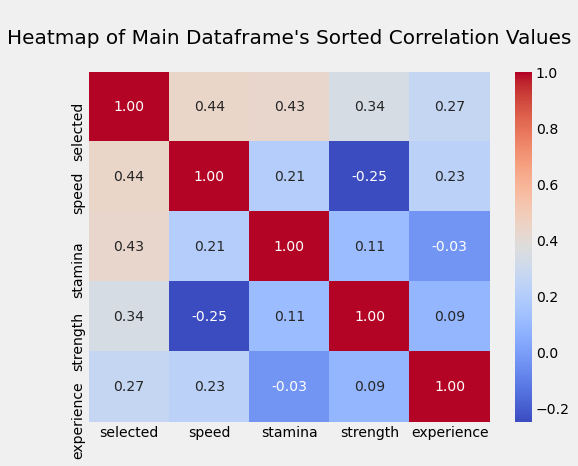

In [18]:
target = 'selected'
k = 10

corr_vals = df.corr()
cols = corr_vals.nlargest(k, target)[target].index

corr_coeffs = np.corrcoef(df[cols].values.T)

ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(corr_coeffs, cmap='coolwarm', annot=True, fmt='.2f', yticklabels=cols.values, xticklabels=cols.values)
ax.set_title('\nHeatmap of Main Dataframe\'s Sorted Correlation Values\n', fontsize=20)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, "\nRelationship between\n'Speed' and 'Selected' Columns\n")

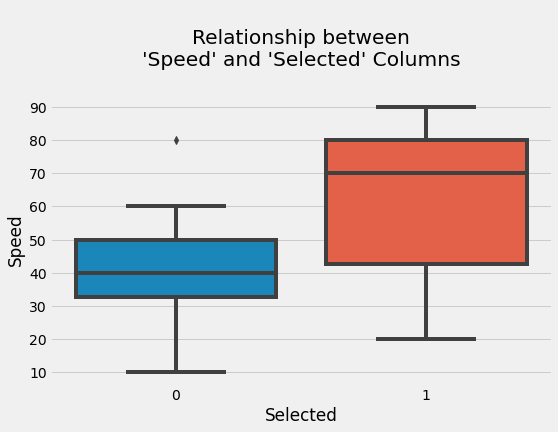

In [19]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,5))

# plt.plot([0, 2000000], [0, 15000000], '--go')
sns.boxplot(df['selected'], df['speed'])
plt.xlabel("Selected")
plt.ylabel("Speed")
plt.title("\nRelationship between\n\'Speed\' and \'Selected\' Columns\n")

In [6]:
logistic_model = LogisticRegression(class_weight='balanced')

X_train, X_test, Y_train, Y_test = train_test_split(
    X, 
   df['selected'], 
   test_size=0.5,  
   random_state=42
)

### Part III. Using the Algorithm of your choice

In [7]:
logistic_model.fit(X_train, Y_train)

LogisticRegression(class_weight='balanced')

### Part IV. Evaluating the Model


Train Accuracy = 90.0000

Test Accuracy = 80.0000
Test Precision Score = 66.6667
Test Recall Score = 100.0000



Text(0.5, 257.44, '\nPredicted label\n')

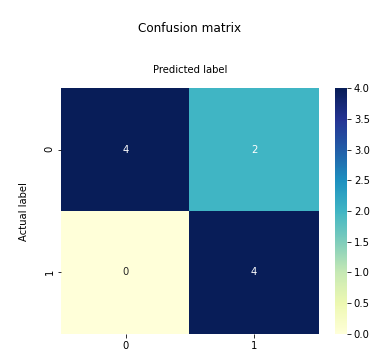

In [8]:
pred_train = logistic_model.predict(X_train)
pred_test =  logistic_model.predict(X_test)
train_accuracy = metrics.accuracy_score(pred_train, Y_train)
test_accuracy = metrics.accuracy_score(pred_test, Y_test)

print(f'\nTrain Accuracy = {train_accuracy * 100:.4f}')
print(f'\nTest Accuracy = {test_accuracy * 100:.4f}')
print(f'Test Precision Score = {metrics.precision_score(Y_test, pred_test) * 100:.4f}')
print(f'Test Recall Score = {metrics.recall_score(Y_test, pred_test) * 100:.4f}\n')

cnf_matrix = metrics.confusion_matrix(Y_test, pred_test)
cnf_matrix

class_names=["0","1"] # name of classes
fig, ax = plt.subplots(figsize=(5, 4))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# labels = ['True Neg','False Pos','False Neg','True Pos']
# labels = np.asarray(labels).reshape(2,2)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('\nConfusion matrix\n')
plt.ylabel('\nActual label\n')
plt.xlabel('\nPredicted label\n')